# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file = "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = np.shape(train['features'])[0]

# TODO: Number of testing examples.
n_test = np.shape(test['features'])[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (np.shape(train['features'])[1], np.shape(train['features'])[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.size(np.unique(train['labels']))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from random import sample
# Visualizations will be shown in the notebook.

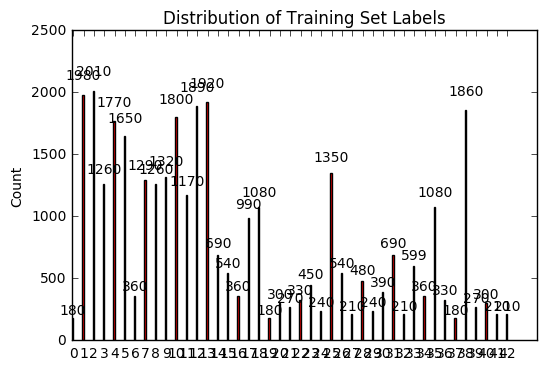

In [4]:
from collections import Counter

count_dict = Counter(train['labels'])
labels_count = sorted(count_dict.items(), key=lambda item:item[0])

bar_values = [item[1] for item in labels_count]
bar_labels = [item[0] for item in labels_count]
N = 5

ind = np.arange(n_classes)  # the x locations for the groups
width = 0.12       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, bar_values, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_title('Distribution of Training Set Labels')
ax.set_xticks(ind + width)
ax.set_xticklabels(bar_labels)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width(), 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Pre-process 1: *Augment training set*

(139196, 32, 32, 3) (139196,)


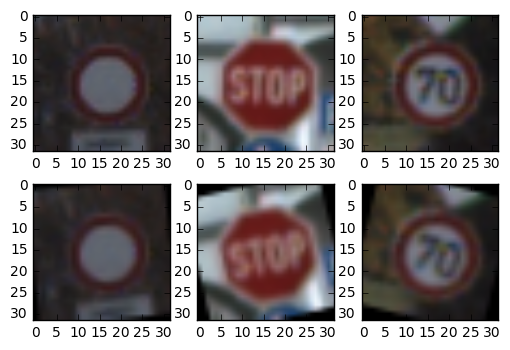

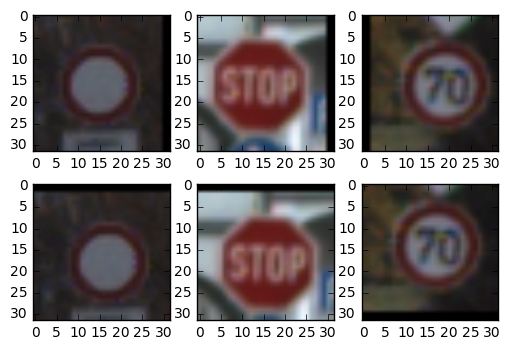

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import random
import cv2

# Randomly rotate training set. ([-15, 15] angles)
rotated_train = {'features': [], 'labels': []}
for img, label in zip(train['features'], train['labels']):
    RotateMatrix = cv2.getRotationMatrix2D(center=(img.shape[1]/2, img.shape[0]/2), angle=random.uniform(-15, 15), scale=1)
    rotated_train['features'].append(cv2.warpAffine(img, RotateMatrix, (img.shape[0], img.shape[1])))
    rotated_train['labels'].append(label)
    

# Randomly perturbe training set in position. (on x/y axis, [-2,2] pixels)
perturbed_train = {'features': [], 'labels': []}
for img, label in zip(train['features'], train['labels']):
    pixel = random.sample([-2, -1, 1, 2], 1)[0]
    TranslationMatrix = np.array([[1, 0, pixel],
                                  [0, 1, 0]], dtype=np.float32)
    perturbed_train['features'].append(cv2.warpAffine(img, TranslationMatrix, (img.shape[0], img.shape[1])))
    perturbed_train['labels'].append(label)
    
    pixel = random.sample([-2, -1, 1, 2], 1)[0]
    TranslationMatrix = np.array([[1, 0, 0],
                                  [0, 1, pixel]], dtype=np.float32)
    perturbed_train['features'].append(cv2.warpAffine(img, TranslationMatrix, (img.shape[0], img.shape[1])))
    perturbed_train['labels'].append(label)

big_train = {
        'features':
            np.concatenate([train['features'], rotated_train['features'], perturbed_train['features']]),
        'labels':
            np.concatenate([train['labels'], rotated_train['labels'], perturbed_train['labels']])
    }

print(np.shape(big_train['features']), np.shape(big_train['labels']))

sample_idxes = sample(range(n_train), 3)

fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(2, 3, i+1)
    img = train['features'][sample_idxes[i],:,:,:]
    ax.imshow(img)
    
    RotateMatrix = cv2.getRotationMatrix2D(center=(img.shape[1]/2, img.shape[0]/2), angle=random.uniform(-15, 15), scale=1)
    rotated_img = cv2.warpAffine(img, RotateMatrix, (img.shape[0], img.shape[1]))
    ax = fig.add_subplot(2, 3, i+4)
    ax.imshow(rotated_img)

plt.show()

fig = plt.figure()
for i in range(3):
    img = train['features'][sample_idxes[i],:,:,:]
    pixel = random.sample([-2, -1, 1, 2], 1)[0]
    TranslationMatrix = np.array([[1, 0, pixel],
                                  [0, 1, 0]], dtype=np.float32)
    vertical_img = cv2.warpAffine(img, TranslationMatrix, (img.shape[0], img.shape[1]))
    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(vertical_img)
    
    pixel = random.sample([-2, -1, 1, 2], 1)[0]
    TranslationMatrix = np.array([[1, 0, 0],
                                  [0, 1, pixel]], dtype=np.float32)
    he_img = cv2.warpAffine(img, TranslationMatrix, (img.shape[0], img.shape[1]))
    ax = fig.add_subplot(2, 3, i+4)
    ax.imshow(he_img)
    
plt.show()

#### Pre-process 2: *Grayscale*

(139196, 32, 32, 1)


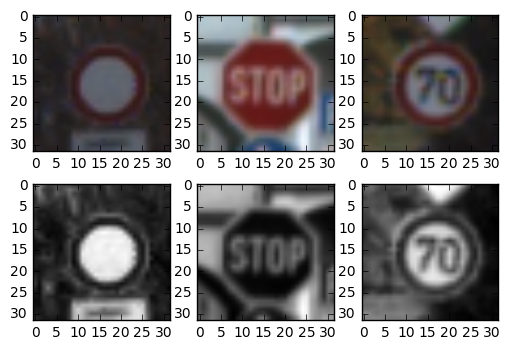

In [6]:
gray_train = [cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in big_train['features']]
gray_valid = [cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in valid['features']]
gray_test = [cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in test['features']]

gray_train = np.reshape(gray_train, (len(gray_train), 32, 32, -1))
gray_valid = np.reshape(gray_valid, (len(gray_valid), 32, 32, -1))
gray_test = np.reshape(gray_test, (len(gray_test), 32, 32, -1))

print(np.shape(gray_train))

fig = plt.figure()
for i in range(3):
    ax = fig.add_subplot(2, 3, i+1)
    img = train['features'][sample_idxes[i],:,:,:]
    ax.imshow(img)

    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ax = fig.add_subplot(2, 3, i+4)
    ax.imshow(img, 'gray')

plt.show()

### Model Architecture

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten

EPOCHS = 50
BATCH_SIZE = 64
rate = 0.001
mu = 0
sigma = 0.1
l2_lambda = 5e-4

def conv2d(x, W, b, strides=1, padding='VALID'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')

def lrn(inputs, depth_radius=2, alpha=0.0001, beta=0.75, bias=1.0):
    return tf.nn.local_response_normalization(inputs, depth_radius=depth_radius, alpha=alpha, beta=beta, bias=bias)


In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

with tf.name_scope('Variances'):
    weights = {
        'wc1_1': tf.Variable(tf.truncated_normal([9, 9, 1, 32])),
        'wc1_2': tf.Variable(tf.truncated_normal([5, 5, 1, 32])),
        'wc2_1': tf.Variable(tf.truncated_normal([5, 5, 32, 128])),
        'wc2_2': tf.Variable(tf.truncated_normal([9, 9, 32, 128])),
        'wc3': tf.Variable(tf.truncated_normal([3, 3, 256, 512])),
        'wd1': tf.Variable(tf.truncated_normal([8192, 2048])),
        'wd2': tf.Variable(tf.truncated_normal([2048, 2048])),
        'out': tf.Variable(tf.truncated_normal([2048, n_classes]))}

    biases = {
        'bc1_1': tf.Variable(tf.truncated_normal([32])),
        'bc1_2': tf.Variable(tf.truncated_normal([32])),
        'bc2_1': tf.Variable(tf.truncated_normal([128])),
        'bc2_2': tf.Variable(tf.truncated_normal([128])),
        'bc3': tf.Variable(tf.truncated_normal([512])),
        'bd1': tf.Variable(tf.truncated_normal([2048])),
        'bd2': tf.Variable(tf.truncated_normal([2048])),
        'out': tf.Variable(tf.truncated_normal([n_classes]))}

with tf.name_scope('conv1_1'):
    conv1_1 = conv2d(x, weights['wc1_1'], biases['bc1_1'])
    conv1_1 = lrn(conv1_1)
    
with tf.name_scope('pool1_1'):
    conv1_1 = maxpool2d(conv1_1, k=2)

with tf.name_scope('conv1_2'):
    conv1_2 = conv2d(x, weights['wc1_2'], biases['bc1_2'], padding='SAME')
    conv1_2 = lrn(conv1_2)

with tf.name_scope('pool1_2'):
    conv1_2 = maxpool2d(conv1_2, k=2)

with tf.name_scope('conv2_1'):
    conv2_1 = conv2d(conv1_1, weights['wc2_1'], biases['bc2_1'])
    conv2_1 = lrn(conv2_1)
#     conv2_1 = maxpool2d(conv2_1, k=2)

with tf.name_scope('conv2_2'):
    conv2_2 = conv2d(conv1_2, weights['wc2_2'], biases['bc2_2'])
    conv2_2 = lrn(conv2_2)
#     conv2_2 = maxpool2d(conv2_2, k=2)
    
with tf.name_scope('conv3'):
    reshaped_conv = tf.concat(1, [tf.reshape(conv2_1, [-1, 8192]), tf.reshape(conv2_2, [-1, 8192])])
    reshaped_conv = tf.reshape(reshaped_conv, [-1, 8, 8, 256])
    conv3 = conv2d(reshaped_conv, weights['wc3'], biases['bc3'], padding='SAME')

with tf.name_scope('pool3'):
    conv3 = maxpool2d(conv3, k=2)

reshaped_conv3 = tf.reshape(conv3, [-1, 8192])

with tf.name_scope('fc1'):
    fc1 = tf.add(tf.matmul(reshaped_conv3, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
#     fc1 = tf.nn.dropout(fc1, keep_prob)

with tf.name_scope('fc2'):
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    fc2 = tf.nn.relu(fc2)
#     fc2 = tf.nn.dropout(fc2, keep_prob)
    

with tf.name_scope('output'):
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    predicts = tf.argmax(logits, 1)

with tf.name_scope('loss'):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy)
    for weights, biases in zip(weights.values(), biases.values()):
        loss_operation += l2_lambda * (tf.nn.l2_loss(weights) + tf.nn.l2_loss(biases))
    summary = [tf.summary.scalar('Log_Loss', tf.log(loss_operation))]

with tf.name_scope('optimizer'):
    global_step = tf.Variable(0)
    lr = 0.001
    dr = 0.96
    learning_rate = tf.train.exponential_decay(
        learning_rate=lr,
        global_step=global_step*BATCH_SIZE,
        decay_steps=20,
        decay_rate=dr,
        staircase=True
    )
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_operation = optimizer.minimize(loss_operation)

with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(predicts, tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

merged_summary = tf.summary.merge(summary)

writer = tf.summary.FileWriter('./board', tf.get_default_graph())

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [10]:
def evaluate(X_data, y_data, kp=1.):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:kp})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [11]:
sess = tf.Session()

with sess.as_default():
    sess.run(tf.global_variables_initializer())
    num_examples = len(gray_train)

    print("Training...")
    print()
    k = 1
    for i in range(EPOCHS):
        X_train, y_train = shuffle(gray_train, big_train['labels'])
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            _, summary_result = sess.run([training_operation, merged_summary], feed_dict={x: batch_x, y: batch_y, keep_prob: .5})
            writer.add_summary(summary_result, k)
            k += 1
#             train_accuracy = evaluate(batch_x, batch_y)
#             validation_accuracy = evaluate(gray_valid, valid['labels'])
#             print("Train Accuracy = {:.9f}".format(train_accuracy))
#             print("Validation Accuracy = {:.9f}".format(validation_accuracy))
#             print()
    
        train_accuracy = evaluate(gray_train, big_train['labels'])
        validation_accuracy = evaluate(gray_valid, valid['labels'])

        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.9f}".format(train_accuracy))
        print("Validation Accuracy = {:.9f}".format(validation_accuracy))
        print()
        
    saver = tf.train.Saver(tf.global_variables())
    saver.save(sess,"checkpoint.data")

Training...

EPOCH 1 ...
Train Accuracy = 0.796042990
Validation Accuracy = 0.771655329

EPOCH 2 ...
Train Accuracy = 0.854895256
Validation Accuracy = 0.817687075

EPOCH 3 ...
Train Accuracy = 0.894896405
Validation Accuracy = 0.847165533

EPOCH 4 ...
Train Accuracy = 0.921448892
Validation Accuracy = 0.877551020

EPOCH 5 ...
Train Accuracy = 0.936901922
Validation Accuracy = 0.880952381

EPOCH 6 ...
Train Accuracy = 0.950896577
Validation Accuracy = 0.897052154

EPOCH 7 ...
Train Accuracy = 0.947254231
Validation Accuracy = 0.890022675

EPOCH 8 ...
Train Accuracy = 0.962304951
Validation Accuracy = 0.901814059

EPOCH 9 ...
Train Accuracy = 0.964855312
Validation Accuracy = 0.909297052

EPOCH 10 ...
Train Accuracy = 0.976730653
Validation Accuracy = 0.931065759

EPOCH 11 ...
Train Accuracy = 0.975380040
Validation Accuracy = 0.926757370

EPOCH 12 ...
Train Accuracy = 0.982743757
Validation Accuracy = 0.925170068

EPOCH 13 ...
Train Accuracy = 0.978533866
Validation Accuracy = 0.916780

In [12]:
with sess.as_default():
    test_accuracy = evaluate(gray_test, test['labels'])
    print("Test Accuracy = {:.9f}".format(test_accuracy))

Test Accuracy = 0.947268409


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

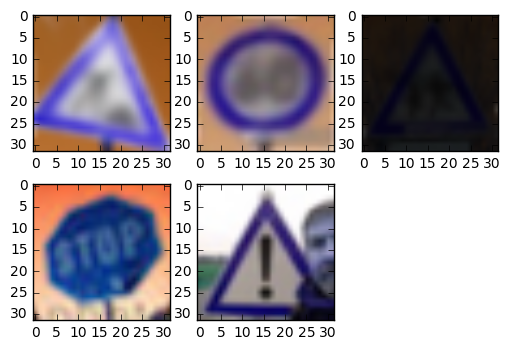

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os

test_images = os.listdir('./testimgs')
testdata = [cv2.resize(cv2.imread('./testimgs/' + image),(32,32),interpolation=cv2.INTER_AREA) for image in test_images]

fig = plt.figure()
for i in range(len(testdata)):
    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(testdata[i])
plt.show()

For first image, the label is **

### Predict the Sign Type for Each Image

In [14]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
gray_testdata = [cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in testdata]
gray_testdata = np.reshape(gray_testdata, (len(gray_testdata), 32, 32, -1))

with sess.as_default():
    softmax_probabilities, results = sess.run([tf.nn.softmax(logits), predicts], feed_dict={x: gray_testdata, keep_prob: 1.})

print(results)

[25 15 28 14 18]


### Analyze Performance

According to the `signames.csv` file, the prediction result are as follows:

- The first image is predicted as "Road work" sign. **Correct**
- The second image is predicted as "Speed limit (60km/h)" sign. **Correct**
- The third image is predicted as "Children crossing" sign. **Correct**
- The fourth image is predicted as "Stop" sign. **Correct**
- The fifth image is predicted as "General caution" sign. **Correct**

So, the model predicted all of these signs correctly, it's 100% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [17]:
with sess.as_default():
    top_5_logits = sess.run(tf.nn.top_k(logits, k=5), feed_dict={x: gray_testdata, keep_prob: 1.})
    
print(top_5_logits)

TopKV2(values=array([[ 2551802.75 ,  1612760.25 ,  1060314.   ,   748194.125,
          697784.125],
       [ 2828225.   ,  2105206.25 ,  1951059.75 ,  1614749.25 ,  1443720.75 ],
       [ 2587074.   ,  1414959.   ,  1111037.75 ,  1063548.   ,
          981617.625],
       [ 2363697.25 ,  1894505.   ,  1853572.75 ,  1517460.5  ,  1480357.5  ],
       [ 6277977.5  ,  3594383.   ,  2227436.75 ,  2083665.875,  1878967.5  ]], dtype=float32), indices=array([[25, 20, 23, 29, 22],
       [15,  9,  3, 32, 42],
       [28, 19, 20, 36, 23],
       [14,  3, 35,  1, 15],
       [18, 26, 11, 27, 37]], dtype=int32))


In [16]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with sess.as_default():
    top_5_probablities = sess.run(tf.nn.top_k(softmax_probabilities, k=5))

print(top_5_probablities)

TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[25,  0,  1,  2,  3],
       [15,  0,  1,  2,  3],
       [28,  0,  1,  2,  3],
       [14,  0,  1,  2,  3],
       [18,  0,  1,  2,  3]], dtype=int32))


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 